In [1]:
!conda install pandas-datareader
!pip install yfinance

# https://finance.yahoo.com/
import pandas as pd
import numpy as np

import yfinance as yfin
from pandas_datareader import data

yfin.pdr_override()

df = data.get_data_yahoo('005930.KS', start = '2021-01-01', end = '2022-06-30')

Solving environment: ...working... done

# All requested packages already installed.

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,81092.062500,38655276
2021-01-05,81600.0,83900.0,81600.0,83900.0,81971.382812,35335669
2021-01-06,83300.0,84500.0,82100.0,82200.0,80310.460938,42089013
2021-01-07,82800.0,84200.0,82700.0,82900.0,80994.367188,32644642
2021-01-08,83300.0,90000.0,83000.0,88800.0,86758.742188,59013307


# 선형회귀 모형 1

 - Time(x): 0부터 순차적으로 증가하는 값
 - Close(y) : 일별 종가

In [5]:
df['Time'] = np.arange(len(df))

<AxesSubplot:xlabel='Time', ylabel='Close'>

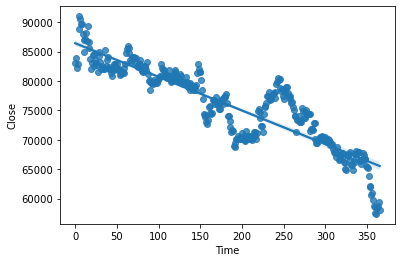

In [7]:
# Time과 Close의 회귀선 시각화
import seaborn as sns
sns.regplot(x = df['Time'], y = df['Close']) # 음의 상관관계

In [8]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Time']]#Time
y = df.loc[:, 'Close']#Close

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
df['y_pred'] = model.predict(X)

<AxesSubplot:xlabel='Date', ylabel='Close'>

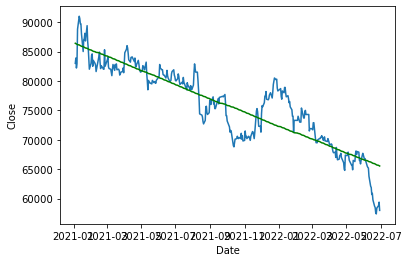

In [13]:
sns.lineplot(x= df.index, y = df['Close'])
sns.lineplot(x= df.index, y = df['y_pred'], color = 'g')

# 선형회귀 모형 2

 - Lag(x): 전날 종가
 - Close(y) : 일별 종가

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time,y_pred
Date,,,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,81092.062500,38655276,0,86406.657137
2021-01-05,81600.0,83900.0,81600.0,83900.0,81971.382812,35335669,1,86349.493629
2021-01-06,83300.0,84500.0,82100.0,82200.0,80310.460938,42089013,2,86292.330121
2021-01-07,82800.0,84200.0,82700.0,82900.0,80994.367188,32644642,3,86235.166614
2021-01-08,83300.0,90000.0,83000.0,88800.0,86758.742188,59013307,4,86178.003106


In [16]:
df['Lag'] = df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Time,y_pred,Lag
Date,,,,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,81092.062500,38655276,0,86406.657137,NaN
2021-01-05,81600.0,83900.0,81600.0,83900.0,81971.382812,35335669,1,86349.493629,83000.0
2021-01-06,83300.0,84500.0,82100.0,82200.0,80310.460938,42089013,2,86292.330121,83900.0
2021-01-07,82800.0,84200.0,82700.0,82900.0,80994.367188,32644642,3,86235.166614,82200.0
2021-01-08,83300.0,90000.0,83000.0,88800.0,86758.742188,59013307,4,86178.003106,82900.0


<AxesSubplot:xlabel='Close', ylabel='Lag'>

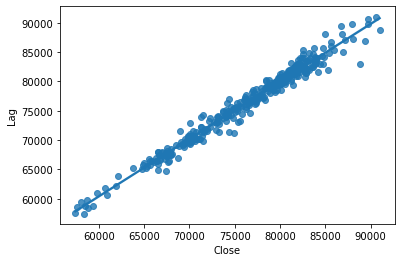

In [17]:
sns.regplot(x=df['Close'], y=df['Lag'])

In [18]:
# 결측치 처리
df.dropna(inplace=True)

In [20]:
# 선형회귀모델

X = df.loc[:, ['Lag']]# Lag
y = df.loc[:, 'Close']# Close

model2 = LinearRegression()
model2.fit(X, y)

LinearRegression()

In [22]:
df['y_pred2'] = model2.predict(X) #model2(어제의 종가를 사용해서 만든 회귀모델 기반 예측값)

<AxesSubplot:xlabel='Date', ylabel='Close'>

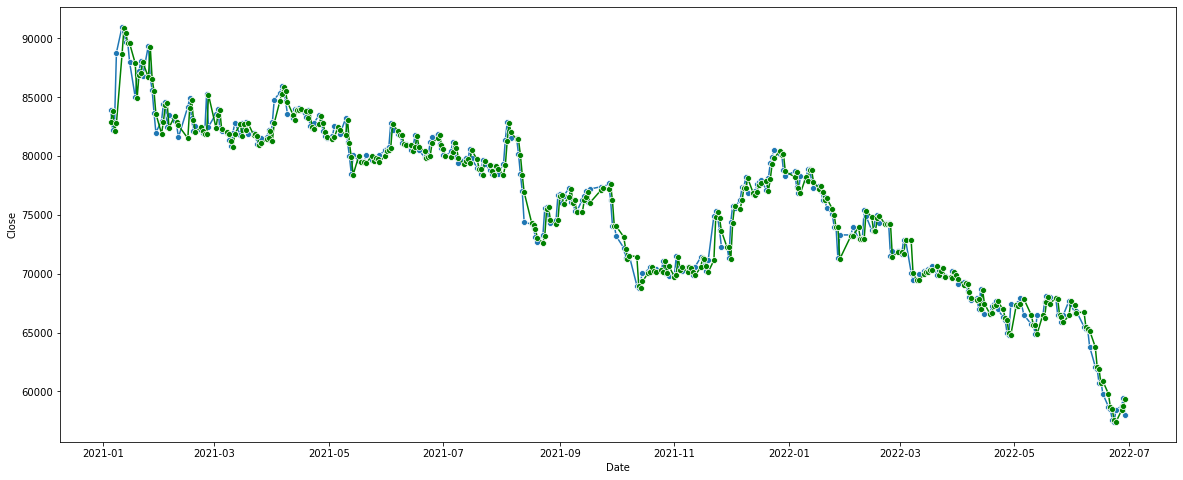

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 8))
sns.lineplot(x= df.index, y = df['Close'], marker ='o')
sns.lineplot(x= df.index, y = df['y_pred2'], color = 'g', marker ='o')

In [32]:
df['diff'] = df['Close'] - df['y_pred2']

<AxesSubplot:xlabel='diff', ylabel='Count'>

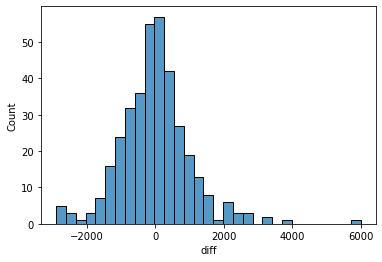

In [33]:
sns.histplot(data = df['diff'] )

<AxesSubplot:xlabel='Close', ylabel='y_pred2'>

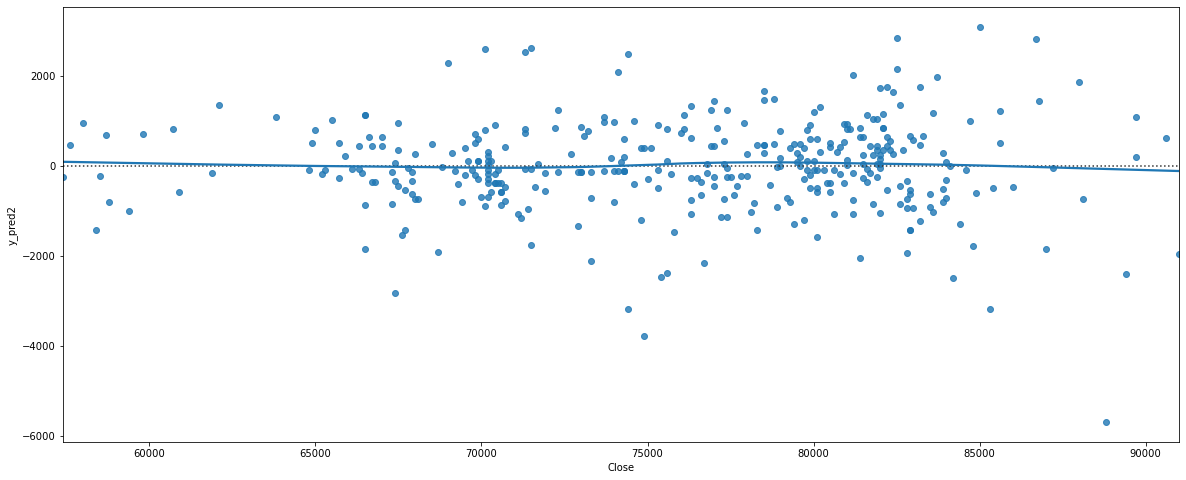

In [30]:
#residual : 잔차
fig = plt.figure(figsize=(20, 8))
sns.residplot(x= df['Close'], y = df['y_pred2'], lowess=True)